## Imports

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dataHouse = pd.read_csv("train.csv")

In [4]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

## Data Inspection

In [19]:
dataHouse.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
dataHouse.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
dataHouse.shape

(1460, 81)

In [23]:
dataHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# Check Unique Values
dataHouse.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [24]:
# Check Nulls
dataHouse.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [27]:
dataHouse.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [28]:
dataHouse.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [26]:
dataHouse.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [29]:
dataHouse.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

## Preparation & Treating Data

In [30]:
df_missing=pd.DataFrame((round(100*(dataHouse.isnull().sum()/len(dataHouse.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [32]:
# Drop Lot Frontage due to excessive nulls
dataHouse.drop("LotFrontage",axis = 1, inplace=True)

In [34]:
# Clear Basment Data
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    dataHouse[col] = dataHouse[col].fillna('No_Basement')

In [36]:
# Changen Null Garage Data to No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataHouse[col] = dataHouse[col].fillna('No_Garage')

In [33]:
# Fix minimal Null Values
dataHouse['FireplaceQu'] = dataHouse['FireplaceQu'].fillna('No_Fireplace')
dataHouse['PoolQC'] = dataHouse['PoolQC'].fillna('No_Pool')
dataHouse['MasVnrArea'] = dataHouse['MasVnrArea'].fillna(0)
dataHouse['MasVnrArea'] = dataHouse['MasVnrArea'].fillna(0)
dataHouse['Alley'] = dataHouse['Alley'].fillna('No_Alley_Access')
dataHouse['Fence'] = dataHouse['Fence'].fillna('No_Fence')
dataHouse['Electrical'] = dataHouse['Electrical'].fillna("Other")
dataHouse['MasVnrType'] = dataHouse['MasVnrType'].fillna('None')
dataHouse['GarageYrBlt'] = dataHouse['GarageYrBlt'].fillna(0)
dataHouse['MiscFeature'] = dataHouse['MiscFeature'].fillna('None')

In [38]:
dataHouse['GarageYrBlt'] = dataHouse['GarageYrBlt'].astype(int)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Veneer Area/Mass')

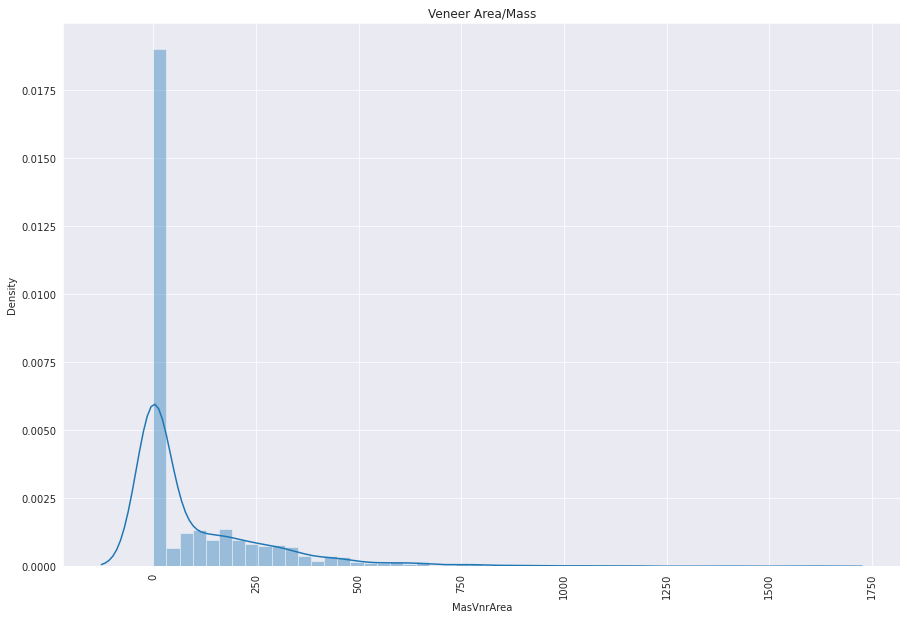

In [46]:
plt.figure(figsize = (15,10))
sns.distplot(dataHouse['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area/Mass')

Text(0.5, 1.0, 'Overall Quality vs Sales Price')

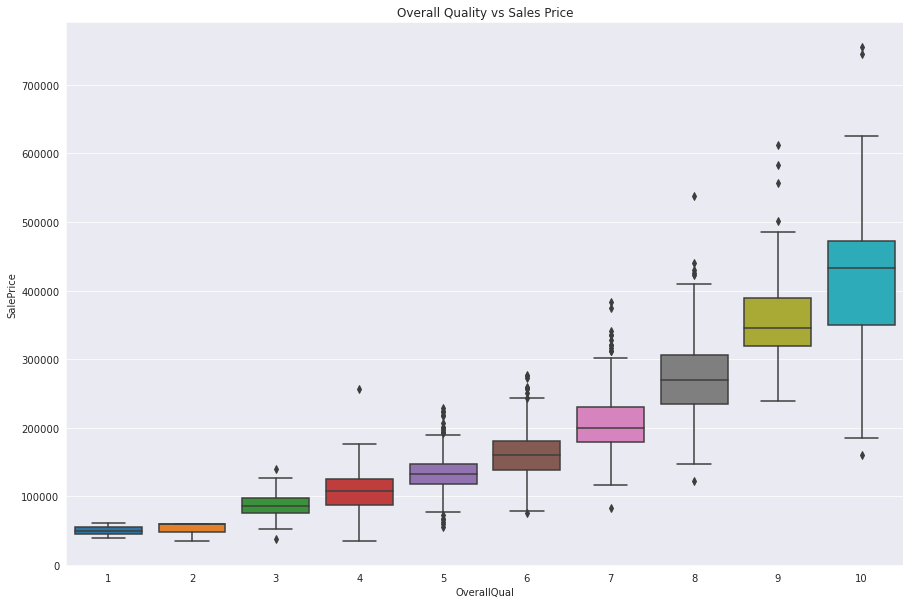

In [63]:
plt.figure(figsize = (15,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=dataHouse)
plt.title("Overall Quality vs Sales Price")

<AxesSubplot:xlabel='SalePrice'>

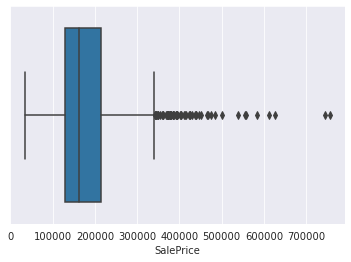

In [60]:
sns.boxplot(x='SalePrice', data=dataHouse)

Text(0.5, 1.0, 'Veneer Area VS Price')

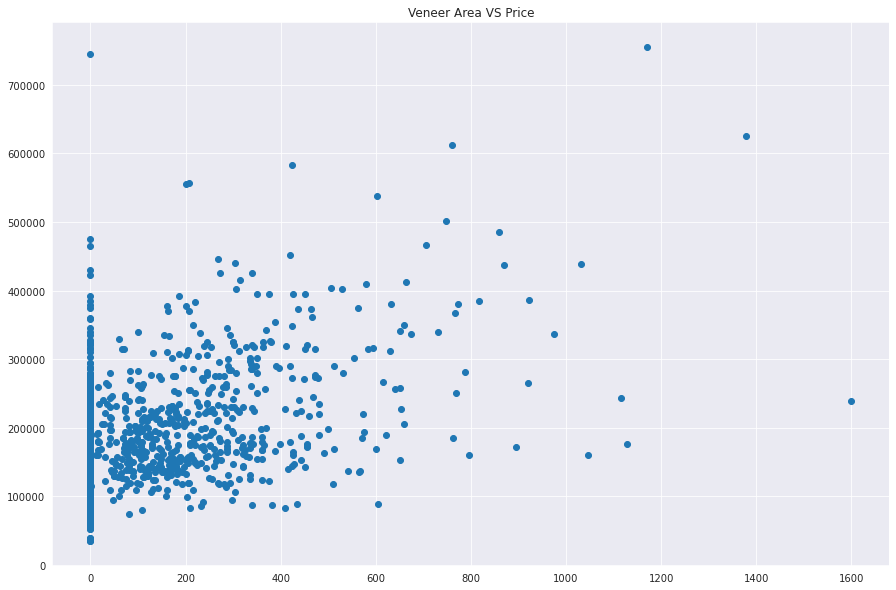

In [48]:
plt.figure(figsize = (15,10))
plt.scatter(dataHouse.MasVnrArea,dataHouse.SalePrice)
plt.title('Veneer Area VS Price')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

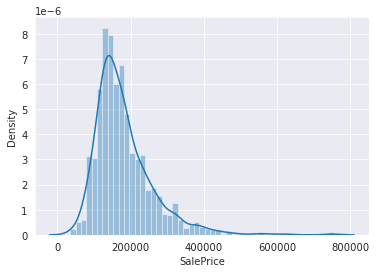

In [50]:
sns.distplot(dataHouse['SalePrice'])

In [51]:
print("Skewness: %f" % dataHouse['SalePrice'].skew())
print("Kurtosis: %f" % dataHouse['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Type of Basement')

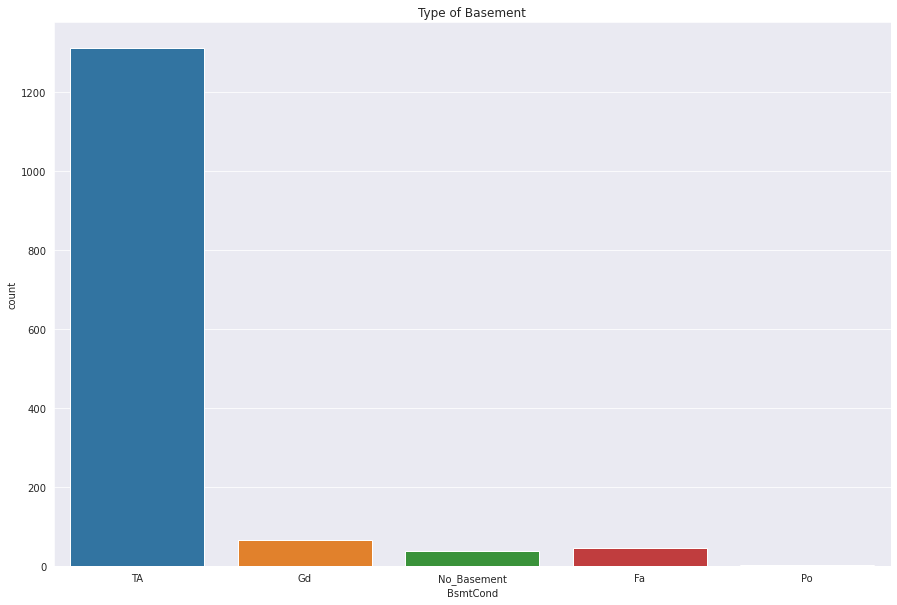

In [52]:
plt.figure(figsize = (15,10))
sns.countplot(x='BsmtCond', data= dataHouse)
plt.title('Type of Basement')

Text(0.5, 1.0, 'Living Area vs Sale Price')

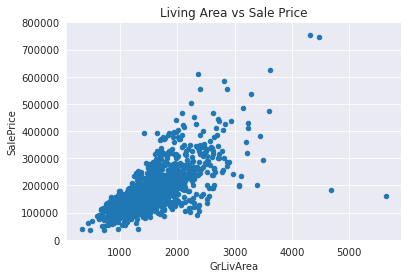

In [58]:
data = pd.concat([dataHouse['SalePrice'], dataHouse['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Living Area vs Sale Price')

Text(0.5, 1.0, 'Correlation Analysis')

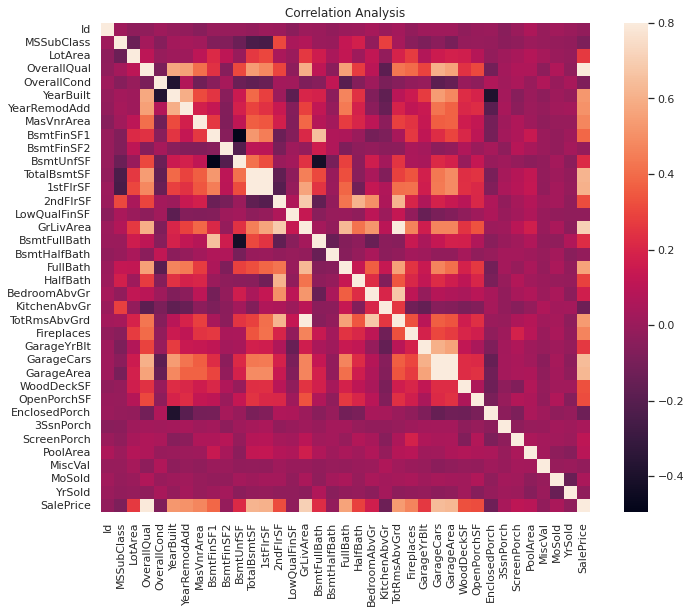

In [67]:
corrmat = dataHouse.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Correlation Analysis")

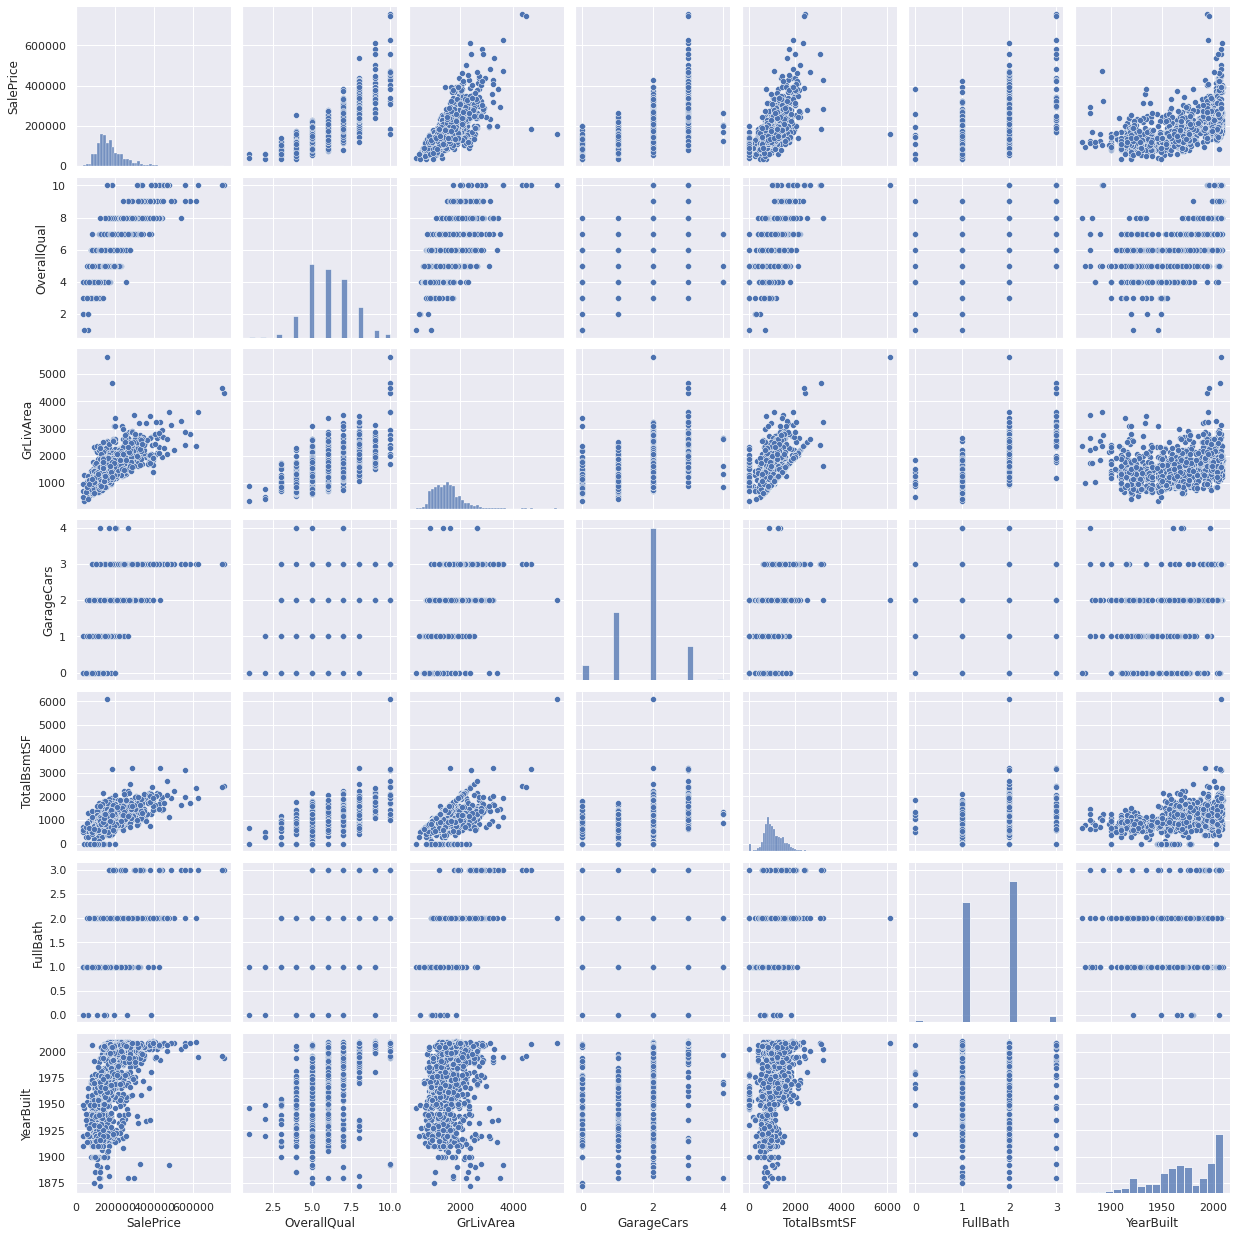

In [66]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataHouse[cols], size = 2.5)
plt.show();

## Data Preperation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

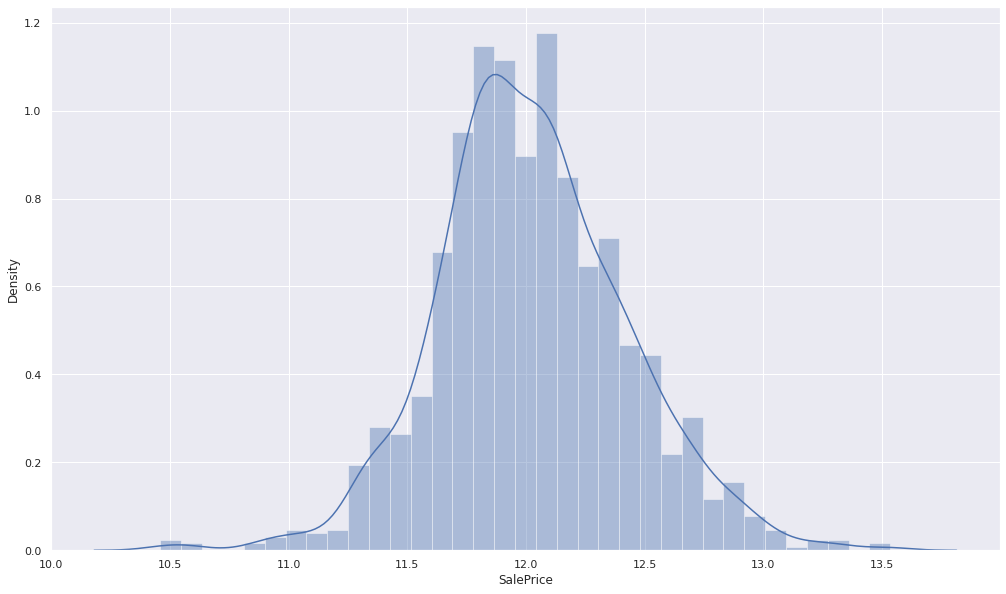

In [70]:
plt.figure(figsize=(17,10))
sns.distplot(np.log(dataHouse["SalePrice"]))

In [71]:
numeric_data = dataHouse.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [73]:
# Converting 0 - 1
dataHouse['PavedDrive'] = dataHouse['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)   
dataHouse['CentralAir'] = dataHouse['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
dataHouse['Street'] = dataHouse['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

In [74]:
cat_values = dataHouse.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [76]:
# Create Dummy Data
dummy_data = pd.get_dummies(cat_values, drop_first=True)
dummy_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [77]:
df = dataHouse.drop(['Id'],axis=1)

In [78]:
df = df.drop(list(cat_values.columns), axis=1)

In [79]:
df = pd.concat([df,dummy_data], axis=1)

In [80]:
# Recheck Shape
df.shape

(1460, 259)

## Train Test Split Data

In [81]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [82]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [83]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [84]:
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## Build Model

In [85]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [86]:
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [87]:
col=X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'RoofMatl_CompShg',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Gd'],
      dtype='object')

In [92]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)
lr=sm.OLS(y_train,X_train_new)

lr_model=lr.fit()


In [93]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.07e-263
Time:                        13:13:21   Log-Likelihood:                 147.54
No. Observations:                1021   AIC:                            -259.1
Df Residuals:                    1003   BIC:                            -170.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.8950      0.073    162.370      0.000      11.751      12.039
BsmtFinSF1           0.0853      0.006     14.785      0.000       0.074       0.097
BsmtFinSF2           0.0022      0.007      0.341      0.733      -0.011       0.015
BsmtUnfSF            0.0396      0.005      7.276      0.000       0.029       0.050
TotalBsmtSF          0.1260      0.008     15.680      0.000       0.110       0.142
1stFlrSF             0.0514      0.009      5.857      0.000       0.034       0.069
2ndFlrSF             0.0908      0.006     16.491      0.000       0.080       0.102
LowQualFinSF        -0.0228      0.007     -3.345      0.001      -0.036      -0.009
GrLivArea            0.1108      0.005     22.681      0.000       0.101       0.120
RoofMatl_CompShg    -0.1164      0.068     -1.705      0.088      -0.250       0.018
RoofMatl_Roll       -0.3061      0.228     -1.342      0.180      -0.754       0.141
RoofMatl_Tar&Grv    -0.1823      0.110     -1.662      0.097      -0.398       0.033
GarageQual_Fa       -0.0598      0.049     -1.216      0.224      -0.156       0.037
GarageQual_Gd        0.1621      0.077      2.119      0.034       0.012       0.312
GarageQual_Po        0.0226      0.163      0.139      0.890      -0.297       0.343
GarageQual_TA        0.1185      0.047      2.515      0.012       0.026       0.211
GarageCond_Fa       -0.0045      0.056     -0.080      0.937      -0.115       0.106
GarageCond_Gd        0.1055      0.089      1.191      0.234      -0.068       0.279
GarageCond_Po       -0.0124      0.100     -0.124      0.901      -0.208       0.183
GarageCond_TA        0.1548      0.047      3.275      0.001       0.062       0.248
PoolQC_Gd           -3.9606      0.240    -16.503      0.000      -4.431      -3.490
==============================================================================
Omnibus:                      426.943   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4381.547
Skew:                          -1.630   Prob(JB):                         0.00
Kurtosis:                      12.611   Cond. No.                     2.54e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Lasso Regression

In [130]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
results_l = pd.DataFrame(lasso_cv.cv_results_)

In [114]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08342929592662612


In [159]:
# Final Lasso Model

alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [148]:
# Predict R-Squared

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8910445936267739


In [149]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8756767740067282


In [150]:
mean_squared_error(y_test, y_test_pred)

0.020456158092071082

In [161]:
lasso.coef_

array([-1.75232482e-02,  1.58650578e-02,  0.00000000e+00,  8.96137071e-02,
        4.81113324e-02,  5.88042806e-02,  2.28974699e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.73389291e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.09498800e-03,
        1.18898603e-01,  3.12209933e-02,  2.10255265e-03,  1.26454914e-02,
        9.13827893e-03,  5.42741593e-03, -1.24714044e-02,  1.40457337e-02,
        7.74794103e-03,  0.00000000e+00,  3.77534569e-02,  7.66295311e-03,
        0.00000000e+00,  1.29504352e-02, -6.99069582e-04,  6.97762451e-03,
        5.31795767e-03,  1.08468400e-02, -1.35396391e-02, -9.54439707e-04,
       -1.59201279e-03, -6.43580296e-03,  9.55944249e-03,  0.00000000e+00,
        5.45153015e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.66125470e-03, -0.00000000e+00,  2.90336986e-02,
       -0.00000000e+00, -

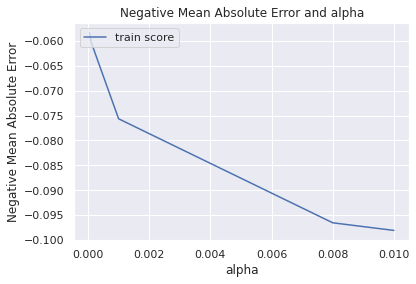

In [162]:
results_l['param_alpha'] = results_l['param_alpha'].astype('float32')

plt.plot(results_l['param_alpha'], results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')

plt.title("Negative Mean Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [169]:
model_cv.best_params_

{'alpha': 0.1}

In [138]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.916617242290773
0.8535715805968973


## Ridge Regression

In [178]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08887547703919177


In [143]:
results = pd.DataFrame(model_cv.cv_results_)
results = results[results['param_alpha']<=100]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005030,0.000575,0.002233,0.000279,0.0001,{'alpha': 0.0001},-0.091447,-0.096863,-0.095550,-0.087447,...,-0.090823,0.005193,14,-0.055211,-0.055236,-0.055979,-0.057179,-0.056415,-0.056004,0.000744
1,0.004424,0.000436,0.002318,0.000512,0.001,{'alpha': 0.001},-0.091137,-0.096802,-0.095485,-0.087306,...,-0.090680,0.005222,13,-0.055246,-0.055247,-0.055991,-0.057243,-0.056444,-0.056035,0.000758
2,0.004936,0.000152,0.002344,0.000131,0.01,{'alpha': 0.01},-0.090627,-0.096395,-0.095063,-0.086614,...,-0.090126,0.005357,8,-0.055463,-0.055351,-0.056109,-0.057451,-0.056593,-0.056194,0.000773
3,0.004793,0.000268,0.002231,0.000073,0.05,{'alpha': 0.05},-0.090154,-0.095338,-0.094105,-0.084608,...,-0.089132,0.005361,3,-0.056363,-0.055810,-0.056665,-0.058124,-0.057561,-0.056905,0.000833
4,0.004561,0.000456,0.002327,0.000333,0.1,{'alpha': 0.1},-0.089905,-0.094666,-0.094046,-0.083357,...,-0.088875,0.005170,1,-0.057537,-0.056276,-0.057350,-0.059052,-0.058742,-0.057791,0.001005
5,0.005009,0.000181,0.002374,0.000180,0.2,{'alpha': 0.2},-0.090315,-0.094277,-0.094541,-0.081775,...,-0.088994,0.005232,2,-0.059759,-0.057039,-0.058592,-0.061050,-0.060627,-0.059413,0.001455
6,0.004030,0.000553,0.001961,0.000276,0.3,{'alpha': 0.3},-0.090795,-0.094254,-0.095061,-0.080692,...,-0.089222,0.005477,4,-0.061546,-0.057675,-0.059753,-0.062749,-0.062206,-0.060786,0.001854
7,0.004135,0.000502,0.001902,0.000249,0.4,{'alpha': 0.4},-0.091165,-0.094387,-0.095553,-0.080022,...,-0.089477,0.005721,5,-0.062985,-0.058197,-0.060697,-0.064107,-0.063546,-0.061907,0.002187
8,0.004675,0.000065,0.002221,0.000100,0.5,{'alpha': 0.5},-0.091507,-0.094460,-0.095969,-0.079738,...,-0.089714,0.005871,6,-0.064157,-0.058660,-0.061502,-0.065237,-0.064675,-0.062846,0.002454
9,0.004584,0.000332,0.002084,0.000194,0.6,{'alpha': 0.6},-0.091751,-0.094494,-0.096322,-0.079779,...,-0.089945,0.005908,7,-0.065161,-0.059092,-0.062206,-0.066221,-0.065627,-0.063662,0.002671


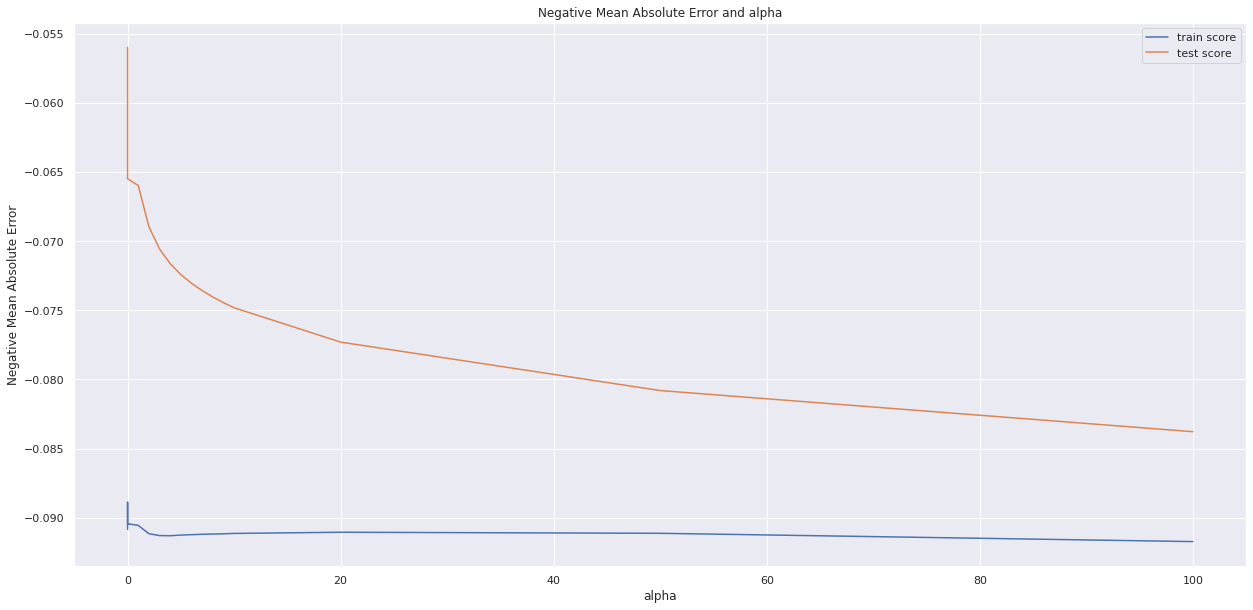

In [144]:
results['param_alpha'] = results['param_alpha'].astype('int32')
plt.figure(figsize=(21,10))
plt.plot(results['param_alpha'], results['mean_test_score'])
plt.plot(results['param_alpha'], results['mean_train_score'])
plt.ylabel('Negative Mean Error')
plt.xlabel('alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.title("Negative Mean Error vs alpha")
plt.show()

In [179]:
# Final Model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02380881,  0.01756293,  0.        ,  0.08046129,  0.04313811,
        0.04071743,  0.02172068, -0.00257992, -0.00097771,  0.00700416,
        0.00451588,  0.00602913,  0.        ,  0.03695129,  0.0421136 ,
        0.00177665,  0.06226231,  0.02976822,  0.00275246,  0.01864372,
        0.01156517,  0.01179765, -0.01287987,  0.0163731 ,  0.00312165,
        0.00102073,  0.03957713,  0.00455883,  0.        ,  0.01346016,
       -0.00288757,  0.00969165,  0.00712374,  0.0107044 , -0.01475185,
       -0.00014224, -0.00136138, -0.006783  ,  0.0517008 ,  0.0388782 ,
        0.06703596,  0.01940284,  0.00210576,  0.02641996,  0.02273775,
       -0.04926646,  0.00507079,  0.03878821,  0.04266282,  0.04801778,
       -0.0122977 ,  0.038309  , -0.03326134, -0.00552617, -0.00547842,
        0.02535981, -0.00783857, -0.00384105, -0.02221851,  0.01750893,
        0.05355814, -0.01409578,  0.10496094, -0.07916573, -0.02884455,
       -0.07058609, -0.04413378, -0.02525731, -0.00775141, -0.01

In [111]:
# Predicted R-Squared
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9212268113837305


In [110]:
# Predicttion for Test Set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8837934074107157


In [109]:
# RMSE Value
mean_squared_error(y_test, y_test_pred)

0.019120646285963844

## Finalisation

In [173]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9570918677565143
0.7467661334091003


In [174]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [175]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.752619
114,RoofMatl_Membran,0.443822
41,MSZoning_RL,0.420250
39,MSZoning_FV,0.419403
40,MSZoning_RH,0.410058
42,MSZoning_RM,0.370905
116,RoofMatl_Roll,0.331017
115,RoofMatl_Metal,0.297196
119,RoofMatl_WdShngl,0.286457
92,Condition2_PosA,0.253583


## Optimal Values for Lasso & Ridge:

#### Lasso: Alpha - 0.001
#### Ridge: Alpha - 0.1

## Best Features / Significant Variables

- MSZoning_RM
- MSSubClass
- Condition2_PosA
- MSZoning_FV
- RoofMatl_WdShngl
- MSZoning_RL
- RoofMatl_Membran
- MSZoning_RH

## Coef of Variables

- MSubClass = 10.75
- RoofMatl_Membran = 0.443822
- MSZoning_RL = 0.420250
- MSZoning_FV = 0.419403
- MSZoning_RH = 0.410058
- MSZoning_RM = 0.370905
- Condition2_PosA = 0.253583
- RoofMatl_WdShngl = 0.286457